In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['pdf.fonttype'] = 42

In [25]:
data = pd.read_csv("~/gigyf2_nsp2/submission/pride/processed/nsp2_fclip_ms.csv")
data["Gene names"] = data["Fasta headers"].apply(lambda x: x.split("|")[2])
data = data.loc[data["Gene names"].apply(lambda x: "GN=" in x),:]
data["Gene names"] = data["Gene names"].apply(lambda x:x.split("GN=")[1])
data["Gene names"] = data["Gene names"].apply(lambda x:x.split(" PE")[0])
data.index = range(len(data))
data["Gene names"] = data["Gene names"].apply(lambda x:x.upper())

In [83]:
prey = data.loc[:,["Protein IDs","Gene names"]]
proteome = pd.read_table("~/reference/proteome/coronavirus/cov2_homo_sapiens.txt")
prey = proteome.loc[:,["Entry","Length","Gene names"]]
prey.drop_duplicates(subset="Gene names",inplace=True)
prey.to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat",sep="\t",header=False,index=False)

data = data[data["Protein IDs"].isin(prey["Entry"])]
virusgenes = proteome[proteome["Organism"] == "SARS-CoV-2"]["Gene names"].tolist()

In [35]:
igg_bait=np.matrix([np.array(["Nsp2_1","Nsp2_2","IgG_1","IgG_2"]),np.append(np.repeat("Nsp2",2),np.repeat("IgG",2)),np.append(np.repeat("T",2),np.repeat("C",2))])
(pd.DataFrame(np.transpose(igg_bait))).to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg_bait.dat",sep="\t",header=False,index=False)
uninf_bait=np.matrix([np.array(["Nsp2_1","Nsp2_2","Uninf_1","Uninf_2"]),np.append(np.repeat("Nsp2",2),np.repeat("Uninf",2)),np.append(np.repeat("T",2),np.repeat("C",2))])
(pd.DataFrame(np.transpose(uninf_bait))).to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf_bait.dat",sep="\t",header=False,index=False)

In [37]:
# Igg normalization
sample_match={"Nsp2_1":"Nsp2", "Nsp2_2":"Nsp2", "IgG_1":"IgG", "IgG_2":"IgG"}
column_match={"Nsp2_1":4,"Nsp2_2":5,"IgG_1":6,"IgG_2":7}
df_list=[]
for i in sample_match:
    first=np.repeat(i,len(data))
    second=np.repeat(sample_match[i],len(data))
    third=np.array(data["Protein IDs"])
    fourth=np.array(pd.to_numeric(data.iloc[:, column_match[i]]))
    df_list.append(pd.DataFrame(np.transpose(np.matrix([first,second,third,fourth]))))

inter=df_list[0]
for i in range(1,len(df_list)):
    inter=pd.concat([inter,df_list[i]])
inter=inter[inter[3]!=0]
inter.to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg/igg_inter.dat",sep="\t",header=False,index=False)

In [40]:
# Uninf normalization
sample_match={"Nsp2_1":"Nsp2", "Nsp2_2":"Nsp2", "Uninf_1":"Uninf", "Uninf_2":"Uninf"}
column_match={"Nsp2_1":4, "Nsp2_2":5, "Uninf_1":8, "Uninf_2":9}
df_list=[]
for i in sample_match:
    first=np.repeat(i,len(data))
    second=np.repeat(sample_match[i],len(data))
    third=np.array(data["Protein IDs"])
    fourth=np.array(pd.to_numeric(data.iloc[:,column_match[i]]))
    df_list.append(pd.DataFrame(np.transpose(np.matrix([first,second,third,fourth]))))

inter=df_list[0]
for i in range(1,len(df_list)):
    inter=pd.concat([inter,df_list[i]])
inter=inter[inter[3]!=0]
inter.to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf/uninf_inter.dat",sep="\t",header=False,index=False)

In [42]:
os.system("cd ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg && /rna/han/packages/SAINTexpress_v3.6.3__2018-03-09/bin/SAINTexpress-spc igg_inter.dat ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg_bait.dat")
os.system("cd ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf && /rna/han/packages/SAINTexpress_v3.6.3__2018-03-09/bin/SAINTexpress-spc uninf_inter.dat ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat ~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf_bait.dat")

Input files are: igg_inter.dat, /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat, /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg_bait.dat
Parsing prey file /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat ...done.
Parsing prey file /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg_bait.dat ...done.
Parsing interaction file igg_inter.dat ...done.
Setting matrix indices for each interaction...

Interaction file: "igg_inter.dat"
Prey file: "/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat"
Bait file: "/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg_bait.dat"
GO file: ""


done.
Creating matrix...done.
Creating a list of unique interactions...done.
Input files are: uninf_inter.dat, /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat, /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf_bait.dat
Parsing prey file /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat ...done.
Parsing prey file /rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf_bait.dat ...done.
Parsing interaction file uninf_inter.dat ...done.
Setting matrix indices for each interaction...

Interaction file: "uninf_inter.dat"
Prey file: "/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/prey.dat"
Bait file: "/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf_bait.dat"
GO file: ""


done.
Creating matrix...done.
Creating a list of unique interactions...done.


0

In [59]:
igg = pd.read_table("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/igg/list.txt")
uninf = pd.read_table("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/uninf/list.txt")
def pre_igg(d):
    d=d[(d.AvgSpec>=2)&(d.BFDR<0.01)&(d.FoldChange>=20)].loc[:,["PreyGene","FoldChange","AvgSpec","BFDR"]]
    d=d.sort_values(by="FoldChange",ascending=False)
    d.columns = ['gene','ratio','spectral_count','fdr']
    return d

def pre_un(d):
    d=d[(d.AvgSpec>=2)&(d.BFDR<0.05)].loc[:,["PreyGene","FoldChange","AvgSpec","BFDR"]]
    d=d.sort_values(by="FoldChange",ascending=False)
    d.columns = ['gene','ratio','spectral_count','fdr']
    return d

igg = pre_igg(igg)
un = pre_un(uninf)

In [100]:
igg = igg[~igg.gene.isin(virusgenes)]
un = un[~un.gene.isin(virusgenes)]
crispr = pd.read_csv("~/__resources/cov2/crispr_screen/coronavirus_crispr_screen.csv")
proviral = crispr[~crispr.sars2_proviral.isna()]
both = pd.merge(igg, un, on='gene', suffixes=('_igg', '_un'))
local=pd.read_csv("~/__resources/annotations/protein_local_sars2_studies.csv")
both = pd.merge(both, local, on = 'gene')
# both.to_csv("~/gigyf2_nsp2/exp_data/nsp2_fclip_ms/results/spec_igg_uninf_local.csv", index=False)

In [89]:
def gordon(file):
    d=pd.read_csv(file)
    d=d[d["Bait"]=="nsp2"]
    d=d[["PreyGene","BFDR","MIST"]]
    d.columns=["gene","bfdr","mist"]
    return d
gosars1=gordon("~/dmv/published/ip_ms/gordon_science/cov1_interaction.csv")
gosars2=gordon("~/dmv/published/ip_ms/gordon_science/cov2_interaction.csv")
#sars1=pd.DataFrame({"sars1":["GIGYF2","PHB1","VDAC1","EIF4E2","PHB2","PCM1","SPEN","MLL2","SLC1A5","EIF3M","STOML2"]})
sars1old=["GIGYF2","PHB1","VDAC1","EIF4E2","PHB2","PCM1","SPEN","MLL2","SLC1A5","EIF3M","STOML2"]
sars1=pd.DataFrame({"gene":gosars1.gene.tolist()+sars1old})
sars2=pd.read_csv("~/gigyf2_nsp2/published/sars/baggen_2021/processed/nsp2_interactome_comprehensive.csv")
sars2=sars2[sars2["Method"]=="AP-MS"]
sars2=sars2[["Gene name","Reference"]]
sars2.columns=["gene","reference"]
set(sars1.gene)&set(sars2.gene)&set(proviral.gene)

{'EIF4E2', 'GIGYF2', 'STOML2'}

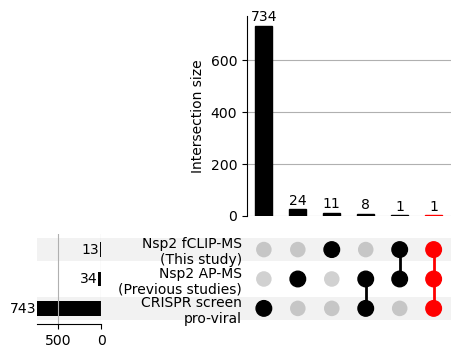

In [91]:
from upsetplot import generate_counts, UpSet

d = pd.DataFrame({"gene":list((set(igg.gene)&set(un.gene))|set(sars2.gene)|set(proviral.gene))})
d["igg"]=d.gene.isin(igg.gene)
d["un"]=d.gene.isin(un.gene)
d["fclip"]=d.igg & d.un
d["sars2"]=d.gene.isin(sars2.gene)
d["crispr"]=d.gene.isin(proviral.gene)

d = d[["fclip", "sars2", "crispr"]]
col = ["Nsp2 fCLIP-MS\n(This study)","Nsp2 AP-MS\n(Previous studies)", "CRISPR screen\npro-viral"]
d.columns = col
d["c"] = 1
d=d.groupby(col).count().sort_values('c')
upset=UpSet(d["c"], sort_by='degree', sort_categories_by="cardinality", show_counts=True)
upset.style_subsets(min_degree=3, facecolor="red")
upset.plot()
plt.savefig('/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/png/bar/upsetplot_nsp2_sars2apms_crispr_proviral.png', dpi=400, bbox_inches = 'tight')
plt.savefig('/rna/han/gigyf2_nsp2/exp_data/nsp2_fclip_ms/pdf/bar/upsetplot_nsp2_sars2apms_crispr_proviral.pdf', bbox_inches = 'tight')

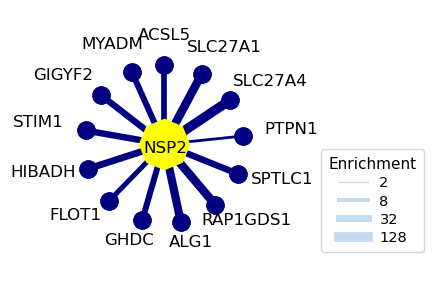

In [108]:
import math
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

d = both[both.gene.apply(lambda x: not x.startswith("NSP"))].reset_index(drop=True)
genes = [x for x in both.gene if not x.startswith("NSP")]
d = d.loc[[0,10,1,2,6,3,4,5,7,8,9,11,12],:].reset_index(drop=True)
d = d.loc[[5,6,2,3,1,0,4,11,7,8,9,10,12],:].reset_index(drop=True)
degree = range(0,360,28)
xs = [math.sin(math.pi * (val / 180)) for val in degree]
ys = [math.cos(math.pi * (val / 180)) for val in degree]
dxs = {d.gene[i]:xs[i] for i in range(len(d))}
dys = {d.gene[i]:ys[i] for i in range(len(d))}
cmap = plt.get_cmap('Blues')

fig, ax = plt.subplots(1,1,figsize = [3.5,3.5])
ax.scatter([0],[0],marker=(8, 0, 0), s = 1300, c = 'yellow', zorder = 4)
ax.annotate("NSP2",(.01,-.1), fontsize = 12, ha = 'center',zorder = 5)
ax.scatter(xs,ys, s = 150, c ='navy', alpha = 1, zorder = 3)
for i in range(len(genes)):
    ax.scatter([xs[i]], [ys[i]], s = 150, c ='navy', alpha = 1, zorder = 3)
    ax.plot([0,xs[i]],[0,ys[i]], lw = np.log2(d['ratio_un'][i]), c="navy", alpha = 1, zorder = 2)

for i in range(len(d)):
    ax.annotate(d.gene[i],(xs[i]*1.6,ys[i]*1.32),fontsize = 12, ha = 'center')

widths = [2, 8, 32, 128]
lines = [mlines.Line2D([], [], color=cmap(0.25), lw = np.log2(width)) for width in widths]
ax.legend(title = 'Enrichment', handles = lines, labels = widths,
                    borderpad = .5, labelspacing = .3, loc = (1.08,.1), title_fontsize = 11, fontsize = 10.5)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# plt.savefig('png/scatter/nsp2_interaction_host_gordon_enrichment.png', dpi=400, bbox_inches = 'tight')
# plt.savefig('pdf/scatter/nsp2_interaction_host_gordon_enrichment.pdf', bbox_inches = 'tight')